## Mavzu 11: Klassifikatsiya

 Reja: 
     1.Классификация ҳақида умумий тушунча
     2. Naiive Bayes
     3. Decision Tree
     4. РОC эгри чизиғи
     5. Чалкашлик матрицаси


In [90]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

fruits = pd.read_table('fruit_data.txt')
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [91]:
print(fruits.shape)

(59, 7)


In [92]:
print(fruits['fruit_name'].unique())

['apple' 'mandarin' 'orange' 'lemon']


In [93]:
print(fruits.groupby('fruit_name').size())

fruit_name
apple       19
lemon       16
mandarin     5
orange      19
dtype: int64


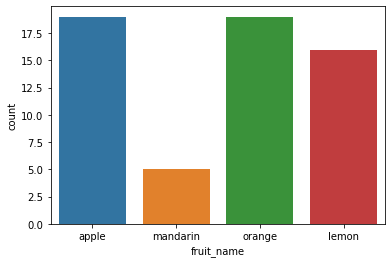

In [94]:
import seaborn as sns
sns.countplot(fruits['fruit_name'],label="Count")
plt.show()

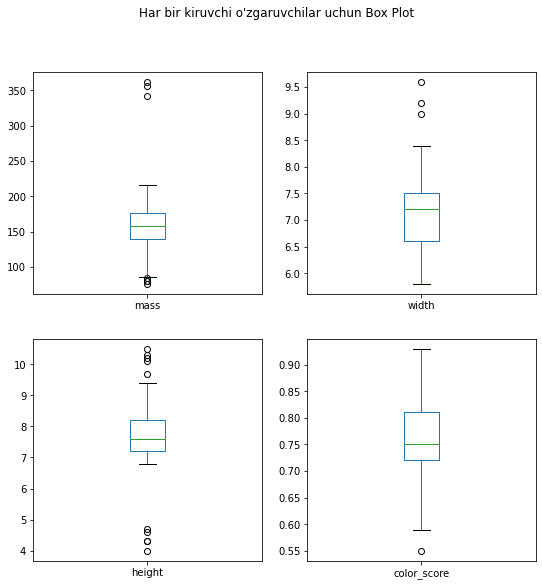

In [95]:
fruits.drop('fruit_label', axis=1).plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(9,9), 
                                        title="Har bir kiruvchi o'zgaruvchilar uchun Box Plot")
plt.savefig('fruits_box')
plt.show()

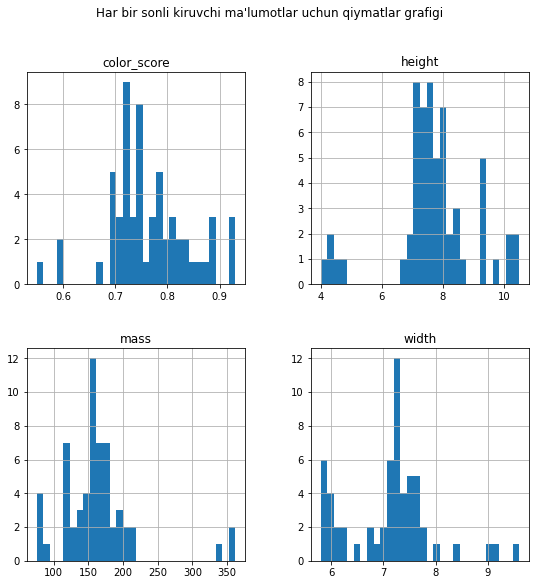

In [96]:
import pylab as pl
fruits.drop('fruit_label' ,axis=1).hist(bins=30, figsize=(9,9))

pl.suptitle("Har bir sonli kiruvchi ma'lumotlar uchun qiymatlar grafigi")
plt.savefig('fruits_hist')
plt.show()

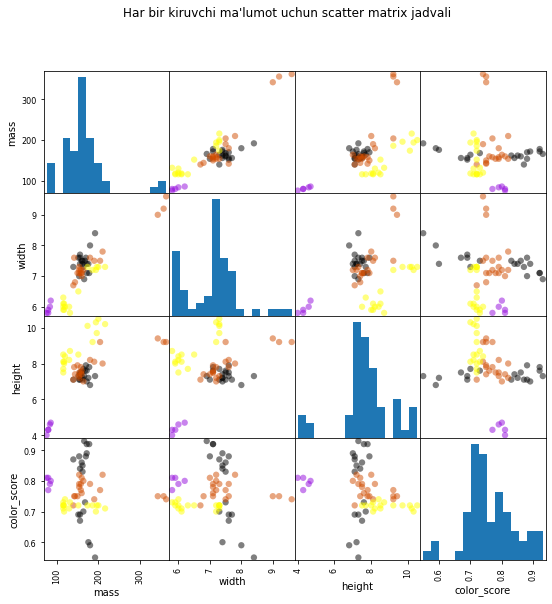

In [97]:
from pandas.plotting import scatter_matrix
from matplotlib import cm

feature_names = ['mass', 'width', 'height', 'color_score']

X = fruits[feature_names]
y = fruits['fruit_label']

cmap = cm.get_cmap('gnuplot')

scatter = scatter_matrix(X, c = y, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap = cmap)

plt.suptitle("Har bir kiruvchi ma'lumot uchun scatter matrix jadvali")
plt.savefig('fruits_scatter_matrix')

In [98]:
print(fruits.describe())

       fruit_label        mass      width     height  color_score
count    59.000000   59.000000  59.000000  59.000000    59.000000
mean      2.542373  163.118644   7.105085   7.693220     0.762881
std       1.208048   55.018832   0.816938   1.361017     0.076857
min       1.000000   76.000000   5.800000   4.000000     0.550000
25%       1.000000  140.000000   6.600000   7.200000     0.720000
50%       3.000000  158.000000   7.200000   7.600000     0.750000
75%       4.000000  177.000000   7.500000   8.200000     0.810000
max       4.000000  362.000000   9.600000  10.500000     0.930000


### Datani Training va Test setga bo'lish va Min max scaler yordamida ixchamlash

In [99]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) 

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Logistic Regression yordamida classifikatsiya qilish

In [100]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

print('Logistik regression classifierni training datada aniqligi: {:.2f}'
     .format(logreg.score(X_train, y_train)))

print('Logistik regression classifierni test datada aniqligi: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Logistik regression classifierni training datada aniqligi: 0.75
Logistik regression classifierni test datada aniqligi: 0.47


### Decision tree yordamida classifikatsiya qilish

In [101]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier().fit(X_train, y_train)

print('Decision Tree classifierni training datada aniqligi: {:.2f}'
     .format(clf.score(X_train, y_train)))

print('Decision Tree classifierni test datada aniqligi: {:.2f}'
     .format(clf.score(X_test, y_test)))

Decision Tree classifierni training datada aniqligi: 1.00
Decision Tree classifierni test datada aniqligi: 0.73


### K-Nearest Neighbors yordamida klassifikatsiya qilish

In [102]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

print('K-NN classifierni training datada aniqligi: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('K-NN classifierni test datada aniqligi: {:.2f}'
     .format(knn.score(X_test, y_test)))

K-NN classifierni training datada aniqligi: 0.95
K-NN classifierni test datada aniqligi: 1.00


### Linear Discriminant Analysis yordamida klassifikatsiya qilish

In [29]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

print('LDA classifierni training datada aniqligi: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('LDA classifierni test datada aniqligi: {:.2f}'
     .format(lda.score(X_test, y_test)))

Accuracy of LDA classifier on training set: 0.86
Accuracy of LDA classifier on test set: 0.67


### Gaussan Naive Bayes yordamida klassifikatsiya qilish

In [103]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

print('GNB classifierni training datada aniqligi: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('GNB classifierni test datada aniqligi: {:.2f}'
     .format(gnb.score(X_test, y_test)))

GNB classifierni training datada aniqligi: 0.86
GNB classifierni test datada aniqligi: 0.67


### Support Vektor Machine yordamida klassifikatsiya qilish

In [104]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)

print('SVM classifierni training datada aniqligi: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('SVM classifierni test datada aniqligi: {:.2f}'
     .format(svm.score(X_test, y_test)))

SVM classifierni training datada aniqligi: 0.91
SVM classifierni test datada aniqligi: 0.80


KNN algorithm eng yaxshi natijaga erishdi. Test set judaham kichik bo'lishiga qaramasdan, The confusion matrix test setda hech qanday xatolik chiqmaganini ko'rsatib beradi.  

In [33]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

pred = knn.predict(X_test)

print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[4 0 0 0]
 [0 1 0 0]
 [0 0 8 0]
 [0 0 0 2]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         2

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

